# COGS 109 Final Project Report
### Molly Varozza, Daniil Magaril, Amy Li, Jason Lee

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
data = pd.read_csv("online_shoppers_intention.csv")

print(data.shape)

(12330, 18)


In [3]:
# Duration on product-related page vs whether they purchased something or not 
productRelatedDuration = data['ProductRelated_Duration']
revenue = data['Revenue']

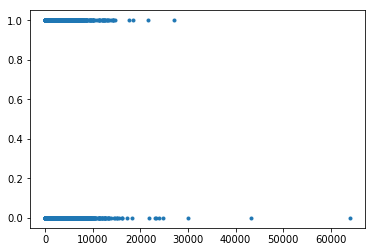

In [4]:
X = productRelatedDuration
Y = revenue

#initial data plot
plt.plot(X, Y, '.')

In [5]:
#Create matrices for first and second order models
A1 = np.column_stack((np.ones((X.shape)), productRelatedDuration))
w1 = np.linalg.lstsq( A1, Y, rcond = None)[0]

A2 = np.column_stack((np.ones((X.shape)), X, np.square(X)))
w2 = np.linalg.lstsq( A2, Y, rcond = None)[0]

In [6]:
#Use matrices generated above to create models
y_pred1 = np.matmul(A1, w1)
y_pred2 = np.matmul(A2, w2)

xRange = np.linspace(min(X)-1, max(X)+1)
ones = np.ones(len(xRange))
squares = np.square(xRange)

A1 = np.column_stack((ones, xRange))
yplot1 = np.matmul(A1, w1)

A2 = np.column_stack((ones, xRange, squares))
yplot2 = np.matmul(A2, w2)

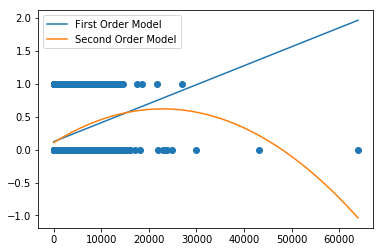

In [7]:
#Plot data alongside created models
plt.scatter(X,Y)

linModel, = plt.plot(xRange, yplot1)
quadModel, = plt.plot(xRange, yplot2)

plt.legend([linModel, quadModel], ["First Order Model", "Second Order Model"])

In [11]:
#Calcualte and print errors
SSELinear = sum(np.square(y_pred1 - Y))
SSEQuad = sum(np.square(y_pred2 - Y))
print('Linear SSE:', SSELinear, '\nQuadratic SSE:', SSEQuad)

('Linear SSE:', 1575.303622644579, '\nQuadratic SSE:', 1561.6283717838467)
